In [7]:
%run organize_functions.ipynb

## Normal Cd

In [8]:
v1cd = np.array([
    [3.009, 2.709, 2.48,  2.301, 2.142, 2.008, 1.867, 1.763, 1.668, 1.586],
    [3.042, 2.747, 2.499, 2.3,   2.136, 1.993, 1.862, 1.755, 1.654, 1.565],
    [3.009, 2.738, 2.472, 2.297, 2.141, 1.985, 1.87,  1.762, 1.661, 1.575],
    [2.985, 2.717, 2.492, 2.316, 2.14,  2.001, 1.881, 1.771, 1.651, 1.578],
    [2.997, 2.755, 2.514, 2.295, 2.16,  1.999, 1.87,  1.748, 1.665, 1.574],
    [3.015, 2.72,  2.512, 2.301, 2.146, 1.99,  1.864, 1.762, 1.669, 1.573],
    [2.981, 2.728, 2.498, 2.314, 2.129, 2.02,  1.874, 1.777, 1.657, 1.576],
    [2.983, 2.731, 2.494, 2.336, 2.13,  2.011, 1.879, 1.746, 1.672, 1.577],
    [3.013, 2.74,  2.5,   2.301, 2.138, 2.009, 1.887, 1.753, 1.678, 1.58 ],
    [2.988, 2.713, 2.499, 2.292, 2.155, 2.007, 1.888, 1.773, 1.644, 1.576]
])

In [9]:
b1cd = np.array([
    [3.001, 2.991, 3.006, 2.992, 3.007, 3.012, 3.01,  2.996, 3.003, 3.028],
    [2.719, 2.722, 2.735, 2.704, 2.744, 2.733, 2.713, 2.705, 2.715, 2.723],
    [2.486, 2.503, 2.508, 2.519, 2.496, 2.489, 2.507, 2.501, 2.495, 2.499],
    [2.304, 2.284, 2.297, 2.314, 2.291, 2.299, 2.297, 2.307, 2.309, 2.32 ],
    [2.146, 2.153, 2.155, 2.148, 2.13,  2.129, 2.142, 2.145, 2.149, 2.164],
    [2.014, 1.994, 2.003, 2.002, 1.986, 2.004, 1.995, 2.01,  1.999, 2.005],
    [1.886, 1.872, 1.884, 1.859, 1.862, 1.889, 1.858, 1.869, 1.862, 1.869],
    [1.764, 1.783, 1.766, 1.774, 1.774, 1.765, 1.759, 1.741, 1.766, 1.772],
    [1.663, 1.666, 1.666, 1.683, 1.684, 1.662, 1.659, 1.669, 1.663, 1.661],
    [1.592, 1.582, 1.572, 1.59,  1.575, 1.577, 1.566, 1.58,  1.555, 1.583]
])

In [10]:
import numpy as np

def build_gm_matrix(start=1, end=1.9, step=1):
    grid = np.arange(start, end + step, step)
    G, M = np.meshgrid(grid, grid, indexing="ij")
    gm_matrix = np.stack([G, M], axis=2)  # shape (n, n, 2)
    return gm_matrix


In [11]:
import numpy as np

def compute_S_from_gm(gm_matrix):
    gm_array = np.array(gm_matrix)  # shape (n, n, 2)
    g = gm_array[:, :, 0]
    m = gm_array[:, :, 1]
    S = 3 * (np.log(g) + np.log(m))
    S = S - S[0, 0] 
    return S

In [12]:
gm = build_gm_matrix(1, 1.9, 0.1)
TS = compute_S_from_gm(gm)

print(gm.shape)  # (10, 10, 2)
print(TS)   # (10, 10)


(10, 10, 2)
[[0.         0.28593054 0.54696467 0.78709279 1.00941671 1.21639532
  1.41001089 1.59188475 1.76335999 1.92556166]
 [0.28593054 0.57186108 0.83289521 1.07302333 1.29534725 1.50232586
  1.69594143 1.87781529 2.04929053 2.2114922 ]
 [0.54696467 0.83289521 1.09392934 1.33405746 1.55638138 1.76335999
  1.95697556 2.13884942 2.31032467 2.47252633]
 [0.78709279 1.07302333 1.33405746 1.57418559 1.7965095  2.00348812
  2.19710368 2.37897755 2.55045279 2.71265445]
 [1.00941671 1.29534725 1.55638138 1.7965095  2.01883342 2.22581203
  2.4194276  2.60130146 2.7727767  2.93497837]
 [1.21639532 1.50232586 1.76335999 2.00348812 2.22581203 2.43279065
  2.62640621 2.80828008 2.97975532 3.14195698]
 [1.41001089 1.69594143 1.95697556 2.19710368 2.4194276  2.62640621
  2.82002178 3.00189564 3.17337088 3.33557255]
 [1.59188475 1.87781529 2.13884942 2.37897755 2.60130146 2.80828008
  3.00189564 3.18376951 3.35524475 3.51744641]
 [1.76335999 2.04929053 2.31032467 2.55045279 2.7727767  2.97975532


In [13]:
S, results, rss, tss, ratio=recover_S_ols_summary(v1cd, b1cd, step=0.1)

RSS (residual sum of squares): 7.119144e-05
TSS (total sum of b²):         8.531519e+00
Circulating / total ratio:     0.000834%


In [14]:
model = ols_S_summary2(S,TS)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.639e+08
Date:                Tue, 03 Feb 2026   Prob (F-statistic):          9.02e-307
Time:                        14:57:30   Log-Likelihood:                 589.13
No. Observations:                 100   AIC:                            -1174.
Df Residuals:                      98   BIC:                            -1169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -2.967      0.0

In [15]:
import numpy as np

def matrix_difference_summary(S_num, S_theory):
    """
    Compare two matrices element-wise (no regression).
    Reports difference-based diagnostics: RSS, TSS, RMSE, MAE, etc.
    """

    # flatten matrices
    y = np.array(S_num, dtype=float).reshape(-1)
    y_ref = np.array(S_theory, dtype=float).reshape(-1)

    if y.shape != y_ref.shape:
        raise ValueError("S_num and S_theory must have the same shape")

    # element-wise difference
    diff = y - y_ref

    # diagnostics
    RSS = np.sum(diff ** 2)
    TSS = np.sum((y - np.mean(y)) ** 2)
    RSS_TSS_ratio = RSS / TSS

    RMSE = np.sqrt(np.mean(diff ** 2))
    MAE = np.mean(np.abs(diff))
    max_abs_error = np.max(np.abs(diff))

    print("Matrix difference diagnostics:")
    print(f"RSS      = {RSS:.2e}")
    print(f"TSS      = {TSS:.2e}")
    print(f"RSS/TSS  = {RSS_TSS_ratio:.2e}")
    print(f"RMSE     = {RMSE:.2e}")
    print(f"MAE      = {MAE:.2e}")
    print(f"Max |Δ|  = {max_abs_error:.2e}")

    return {
        # "diff": diff.reshape(np.shape(S_num)),
        "RSS": RSS,
        "TSS": TSS,
        "RSS/TSS": RSS_TSS_ratio,
        "RMSE": RMSE,
        "MAE": MAE,
        "MaxAbsError": max_abs_error
    }


In [16]:
 matrix_difference_summary(S, TS)

Matrix difference diagnostics:
RSS      = 7.38e-05
TSS      = 7.48e+01
RSS/TSS  = 9.87e-07
RMSE     = 8.59e-04
MAE      = 7.29e-04
Max |Δ|  = 1.90e-03


{'RSS': 7.383855240588225e-05,
 'TSS': 74.79309721570405,
 'RSS/TSS': 9.872375279891286e-07,
 'RMSE': 0.0008592936192354872,
 'MAE': 0.000728958814828618,
 'MaxAbsError': 0.0018956877431803854}

In [17]:
S

array([[0.        , 0.28684328, 0.54697185, 0.78695413, 1.00866978,
        1.21611828, 1.41006774, 1.59170436, 1.76251494, 1.92409099],
       [0.28505672, 0.57275799, 0.83376815, 1.07312075, 1.29583694,
        1.50311733, 1.69628056, 1.87763041, 2.04879946, 2.21051705],
       [0.54611217, 0.83381379, 1.09497202, 1.33412379, 1.55753988,
        1.76438355, 1.95725677, 2.13858726, 2.30963545, 2.47126069],
       [0.78606601, 1.07266299, 1.33423235, 1.5748125 , 1.79756524,
        2.00437021, 2.1978257 , 2.37947641, 2.55024439, 2.71167957],
       [1.00752286, 1.29438981, 1.55678189, 1.79717861, 2.01948837,
        2.22675636, 2.42044942, 2.6019483 , 2.77323611, 2.93533363],
       [1.21521275, 1.5019415 , 1.7636268 , 2.0043317 , 2.22640326,
        2.43346744, 2.6276173 , 2.80953127, 2.98121813, 3.14338521],
       [1.40992391, 1.69533663, 1.9569521 , 2.19736813, 2.41937553,
        2.62699285, 2.82142108, 3.00379133, 3.17491995, 3.33675386],
       [1.59217233, 1.87782903, 2.1389268

## Hetero CD

In [18]:
import numpy as np

v1cd2 = np.array([
    [2.48819, 2.28564, 2.08734, 1.90587, 1.78986, 1.65271, 1.56050, 1.47031, 1.39957, 1.32459],
    [2.48829, 2.28647, 2.09546, 1.93473, 1.78973, 1.67295, 1.56822, 1.45789, 1.39245, 1.31083],
    [2.49705, 2.25530, 2.08965, 1.93369, 1.78034, 1.66517, 1.55377, 1.47946, 1.38719, 1.30450],
    [2.50096, 2.28781, 2.07075, 1.90882, 1.78166, 1.65951, 1.56185, 1.47688, 1.39091, 1.32343],
    [2.50493, 2.28235, 2.07448, 1.91931, 1.78404, 1.65416, 1.56177, 1.45646, 1.40248, 1.31451],
    [2.50174, 2.27412, 2.07247, 1.93813, 1.77818, 1.67293, 1.55860, 1.45662, 1.39984, 1.31284],
    [2.50885, 2.27039, 2.10314, 1.91744, 1.79613, 1.69455, 1.55661, 1.48195, 1.38840, 1.31416],
    [2.51267, 2.27785, 2.07079, 1.93300, 1.78222, 1.66248, 1.56104, 1.45779, 1.37837, 1.31008],
    [2.50019, 2.25960, 2.06692, 1.93474, 1.78857, 1.66235, 1.56844, 1.48632, 1.38658, 1.31731],
    [2.48671, 2.26781, 2.07117, 1.92140, 1.79591, 1.66498, 1.56145, 1.47661, 1.37980, 1.30718]
])


In [19]:
import numpy as np

b1cd2 = np.array([
    [2.50277, 2.50123, 2.50860, 2.50461, 2.48881, 2.50655, 2.52155, 2.48372, 2.49382, 2.48574],
    [2.26280, 2.29252, 2.27569, 2.24794, 2.28074, 2.27664, 2.29772, 2.26095, 2.28575, 2.25336],
    [2.09363, 2.07374, 2.08270, 2.08082, 2.07374, 2.09246, 2.08437, 2.08108, 2.07559, 2.11152],
    [1.91759, 1.91427, 1.93155, 1.92225, 1.92337, 1.93425, 1.91337, 1.93385, 1.91481, 1.92837],
    [1.78010, 1.77312, 1.79683, 1.80672, 1.79928, 1.76763, 1.79249, 1.78150, 1.79830, 1.78479],
    [1.65849, 1.67203, 1.66301, 1.65426, 1.65650, 1.65595, 1.65213, 1.67645, 1.66847, 1.65297],
    [1.56688, 1.56113, 1.55882, 1.58333, 1.56139, 1.54512, 1.55267, 1.56727, 1.54536, 1.55920],
    [1.45943, 1.45893, 1.46373, 1.48126, 1.47501, 1.48467, 1.46170, 1.48068, 1.47409, 1.47369],
    [1.38647, 1.39002, 1.39628, 1.39308, 1.39286, 1.37549, 1.38644, 1.40041, 1.38457, 1.40103],
    [1.32938, 1.31021, 1.31867, 1.30292, 1.32018, 1.30314, 1.31653, 1.31703, 1.31151, 1.30957]
])


In [20]:
import numpy as np

def compute_S_from_gm2(gm_matrix):
    gm_array = np.array(gm_matrix)  # shape (n, n, 2)
    g = gm_array[:, :, 0]
    m = gm_array[:, :, 1]
    S = 2.5 * (np.log(g) + np.log(m))
    S = S - S[0, 0] 
    return S

In [21]:
gm = build_gm_matrix(1, 1.9, 0.1)
TScd2 = compute_S_from_gm2(gm)

print(gm.shape)  # (10, 10, 2)
print(TScd2)   # (10, 10)


(10, 10, 2)
[[0.         0.23827545 0.45580389 0.65591066 0.84118059 1.01366277
  1.17500907 1.32657063 1.46946666 1.60463472]
 [0.23827545 0.4765509  0.69407934 0.89418611 1.07945604 1.25193822
  1.41328452 1.56484608 1.70774211 1.84291016]
 [0.45580389 0.69407934 0.91160778 1.11171455 1.29698448 1.46946666
  1.63081297 1.78237452 1.92527055 2.06043861]
 [0.65591066 0.89418611 1.11171455 1.31182132 1.49709125 1.66957343
  1.83091973 1.98248129 2.12537732 2.26054538]
 [0.84118059 1.07945604 1.29698448 1.49709125 1.68236118 1.85484336
  2.01618966 2.16775122 2.31064725 2.44581531]
 [1.01366277 1.25193822 1.46946666 1.66957343 1.85484336 2.02732554
  2.18867184 2.3402334  2.48312943 2.61829749]
 [1.17500907 1.41328452 1.63081297 1.83091973 2.01618966 2.18867184
  2.35001815 2.5015797  2.64447574 2.77964379]
 [1.32657063 1.56484608 1.78237452 1.98248129 2.16775122 2.3402334
  2.5015797  2.65314126 2.79603729 2.93120534]
 [1.46946666 1.70774211 1.92527055 2.12537732 2.31064725 2.48312943
 

In [22]:
Scd2, results, rss, tss, ratio=recover_S_ols_summary(v1cd2, b1cd2, step=0.1)

RSS (residual sum of squares): 5.441381e-05
TSS (total sum of b²):         5.929559e+00
Circulating / total ratio:     0.000918%


In [23]:
model = ols_S_summary2(Scd2,TScd2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.438e+08
Date:                Tue, 03 Feb 2026   Prob (F-statistic):          3.21e-315
Time:                        14:57:31   Log-Likelihood:                 627.18
No. Observations:                 100   AIC:                            -1250.
Df Residuals:                      98   BIC:                            -1245.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      5.529      0.0

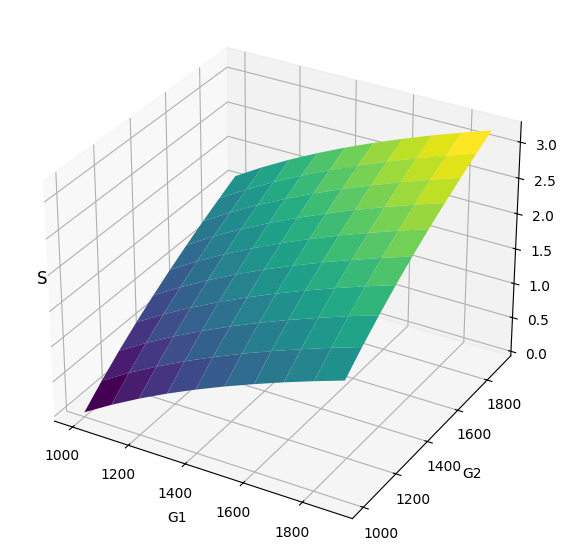

In [24]:
Splot(Scd2,'G2')

In [25]:
matrix_difference_summary(Scd2,TScd2)

Matrix difference diagnostics:
RSS      = 4.76e-04
TSS      = 5.20e+01
RSS/TSS  = 9.15e-06
RMSE     = 2.18e-03
MAE      = 2.06e-03
Max |Δ|  = 3.51e-03


{'RSS': 0.0004755130620848926,
 'TSS': 51.97628986058159,
 'RSS/TSS': 9.14865342178873e-06,
 'RMSE': 0.0021806261992484925,
 'MAE': 0.002055638312986452,
 'MaxAbsError': 0.0035129643895812634}

In [26]:
Scd2

array([[0.        , 0.23826126, 0.45711226, 0.65770865, 0.84263687,
        1.01464296, 1.175282  , 1.32775516, 1.47081958, 1.60709875],
       [0.23870874, 0.47731652, 0.69559286, 0.89613033, 1.08137851,
        1.2537015 , 1.41529139, 1.56635089, 1.70929733, 1.84412491],
       [0.45709071, 0.6956872 , 0.91293035, 1.11336529, 1.29920284,
        1.47171314, 1.63321915, 1.7841392 , 1.92762943, 2.06210367],
       [0.65723318, 0.89612874, 1.11378852, 1.31344766, 1.4990599 ,
        1.67228109, 1.83322988, 1.98467331, 2.12768254, 2.26372266],
       [0.84224209, 1.08126456, 1.29940436, 1.4994174 , 1.68511953,
        1.85788942, 2.01902049, 2.17011561, 2.31316775, 2.44932827],
       [1.01463754, 1.25364854, 1.47156794, 1.67177657, 1.8575104 ,
        2.03010808, 2.19190004, 2.34276639, 2.48613009, 2.6214749 ],
       [1.17615399, 1.41506113, 1.63274229, 1.83272653, 2.01788291,
        2.19102795, 2.35289872, 2.50427031, 2.64727531, 2.78205285],
       [1.32777231, 1.56675919, 1.7840020

In [27]:
TScd2

array([[0.        , 0.23827545, 0.45580389, 0.65591066, 0.84118059,
        1.01366277, 1.17500907, 1.32657063, 1.46946666, 1.60463472],
       [0.23827545, 0.4765509 , 0.69407934, 0.89418611, 1.07945604,
        1.25193822, 1.41328452, 1.56484608, 1.70774211, 1.84291016],
       [0.45580389, 0.69407934, 0.91160778, 1.11171455, 1.29698448,
        1.46946666, 1.63081297, 1.78237452, 1.92527055, 2.06043861],
       [0.65591066, 0.89418611, 1.11171455, 1.31182132, 1.49709125,
        1.66957343, 1.83091973, 1.98248129, 2.12537732, 2.26054538],
       [0.84118059, 1.07945604, 1.29698448, 1.49709125, 1.68236118,
        1.85484336, 2.01618966, 2.16775122, 2.31064725, 2.44581531],
       [1.01366277, 1.25193822, 1.46946666, 1.66957343, 1.85484336,
        2.02732554, 2.18867184, 2.3402334 , 2.48312943, 2.61829749],
       [1.17500907, 1.41328452, 1.63081297, 1.83091973, 2.01618966,
        2.18867184, 2.35001815, 2.5015797 , 2.64447574, 2.77964379],
       [1.32657063, 1.56484608, 1.7823745

## substitute

In [28]:
s1k = np.array([
    [1.9785, 1.8423, 1.7348, 1.625,  1.5235, 1.4406, 1.3503, 1.3001, 1.2288, 1.1917],
    [1.966,  1.8196, 1.6973, 1.585,  1.5048, 1.4003, 1.3367, 1.2822, 1.2261, 1.174],
    [1.9182, 1.7815, 1.6785, 1.5711, 1.4665, 1.3955, 1.3215, 1.2601, 1.1961, 1.1444],
    [1.9143, 1.7612, 1.6433, 1.541,  1.4262, 1.3704, 1.3025, 1.2507, 1.1766, 1.1428],
    [1.8642, 1.732,  1.6061, 1.517,  1.4317, 1.3537, 1.273,  1.2221, 1.1582, 1.1198],
    [1.8356, 1.7085, 1.5941, 1.4872, 1.4071, 1.3188, 1.2701, 1.2227, 1.1469, 1.1138],
    [1.8241, 1.6806, 1.5793, 1.4749, 1.3915, 1.3082, 1.2456, 1.2014, 1.1408, 1.0856],
    [1.7897, 1.6516, 1.5447, 1.447,  1.3499, 1.3052, 1.2292, 1.1747, 1.129,  1.0662],
    [1.7618, 1.6371, 1.5229, 1.4358, 1.3424, 1.2861, 1.2226, 1.1537, 1.115,  1.0631],
    [1.7475, 1.6118, 1.5228, 1.4351, 1.3392, 1.2648, 1.1983, 1.1454, 1.0945, 1.0628]
])

In [29]:
s2k = np.array([
    [1.9992, 1.9436, 1.9329, 1.8904, 1.8427, 1.8397, 1.8184, 1.7815, 1.7447, 1.745],
    [1.8566, 1.8218, 1.78,   1.7644, 1.731,  1.7092, 1.6743, 1.6661, 1.6295, 1.6119],
    [1.7387, 1.6859, 1.6604, 1.6473, 1.6108, 1.5895, 1.5699, 1.5519, 1.5327, 1.5177],
    [1.6156, 1.5903, 1.5556, 1.5467, 1.5197, 1.4874, 1.4622, 1.4593, 1.4439, 1.422],
    [1.5132, 1.4891, 1.4729, 1.4442, 1.417,  1.4082, 1.3942, 1.3748, 1.3554, 1.3216],
    [1.4406, 1.4097, 1.3916, 1.3549, 1.3443, 1.3238, 1.3186, 1.2923, 1.2936, 1.2656],
    [1.3706, 1.3419, 1.3159, 1.2975, 1.2698, 1.2492, 1.2541, 1.2337, 1.2151, 1.2007],
    [1.2937, 1.2728, 1.2606, 1.226,  1.2231, 1.186,  1.1875, 1.1739, 1.1581, 1.1469],
    [1.2413, 1.2142, 1.2065, 1.185,  1.1677, 1.152,  1.1401, 1.1234, 1.1028, 1.0975],
    [1.1928, 1.161,  1.1518, 1.129,  1.1211, 1.1044, 1.0848, 1.0822, 1.0736, 1.0456]
])

In [30]:
es = np.array([
    [0.0,    0.191,  0.3699, 0.5379, 0.6953, 0.8435, 0.9831, 1.1156, 1.2,  1.3631],
    [0.1928, 0.3821, 0.5579, 0.722,  0.8765, 1.0218, 1.1586, 1.2896, 1.415,  1.535 ],
    [0.3726, 0.5575, 0.7305, 0.893,  1.0449, 1.188,  1.3239, 1.4529, 1.5757, 1.6928],
    [0.5403, 0.724,  0.8943, 1.0535, 1.2018, 1.3417, 1.4753, 1.603,  1.7243, 1.8403],
    [0.6967, 0.8765, 1.0434, 1.1996, 1.347,  1.4863, 1.6176, 1.7424, 1.8614, 1.9753],
    [0.8444, 1.0216, 1.1867, 1.3408, 1.4855, 1.6218, 1.7512, 1.8759, 1.9944, 2.1074],
    [0.985,  1.1602, 1.3232, 1.4759, 1.6192, 1.7542, 1.8819, 2.0042, 2.1214, 2.2327],
    [1.1182, 1.2902, 1.4501, 1.5996, 1.7395, 1.8722, 1.999,  2.1192, 2.2343, 2.3441],
    [1.2449, 1.4149, 1.5729, 1.7208, 1.8597, 1.9911, 2.1166, 2.2354, 2.3488, 2.4577],
    [1.3666, 1.5346, 1.6913, 1.8392, 1.9779, 2.1081, 2.2313, 2.3485, 2.4605, 2.5683]
])

In [31]:
Scd2, results, rss, tss, ratio=recover_S_ols_summary(s1k, s2k, step=0.1)
S1=normalize_F(compute_Fs(v1cd2, b1cd2, 1, 3, 3, beta=1.0))
model = ols_S_summary(S1,Scd2)

RSS (residual sum of squares): 2.964277e-05
TSS (total sum of b²):         3.697575e+00
Circulating / total ratio:     0.000802%
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.243e+04
Date:                Tue, 03 Feb 2026   Prob (F-statistic):          3.65e-145
Time:                        14:57:33   Log-Likelihood:                 250.47
No. Observations:                 100   AIC:                            -496.9
Df Residuals:                      98   BIC:                            -491.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

In [32]:
c1k = np.array([
    [2.0088, 1.7318, 1.5337, 1.3613, 1.207,  1.0873, 0.9793, 0.9032, 0.8339, 0.7722],
    [2.0794, 1.8217, 1.6013, 1.4151, 1.2614, 1.1359, 1.04,   0.9505, 0.8699, 0.8056],
    [2.1797, 1.9222, 1.6854, 1.4793, 1.3097, 1.1963, 1.0817, 0.9847, 0.9111, 0.8383],
    [2.2771, 1.96,   1.7526, 1.5501, 1.3861, 1.2479, 1.1192, 1.0244, 0.9439, 0.864],
    [2.323,  2.0265, 1.7828, 1.5956, 1.422,  1.2805, 1.1697, 1.0746, 0.9875, 0.9021],
    [2.3767, 2.0956, 1.836,  1.6486, 1.4898, 1.3299, 1.2082, 1.1212, 0.9988, 0.9263],
    [2.4332, 2.1472, 1.878,  1.6892, 1.5347, 1.4031, 1.2576, 1.1397, 1.0452, 0.9608],
    [2.4541, 2.2029, 1.9413, 1.75,   1.578,  1.4157, 1.3039, 1.1852, 1.0932, 0.9954],
    [2.5081, 2.2142, 1.9746, 1.8076, 1.6004, 1.4609, 1.3098, 1.2078, 1.1311, 1.0263],
    [2.518,  2.2713, 2.0013, 1.823,  1.6409, 1.4841, 1.3466, 1.2485, 1.1369, 1.0609]
])

In [33]:
c2k = np.array([
    [2.0091, 2.0957, 2.1815, 2.2608, 2.3325, 2.3736, 2.43,   2.4567, 2.5048, 2.5251],
    [1.7592, 1.8153, 1.9125, 1.9977, 2.0518, 2.0784, 2.1383, 2.1721, 2.2252, 2.2722],
    [1.5076, 1.6117, 1.6747, 1.7389, 1.8059, 1.8851, 1.9201, 1.9365, 1.9856, 2.0132],
    [1.3472, 1.4169, 1.4795, 1.5444, 1.5803, 1.6687, 1.7009, 1.7389, 1.7673, 1.815],
    [1.1966, 1.2782, 1.3293, 1.3962, 1.4453, 1.4817, 1.5391, 1.5728, 1.618,  1.6483],
    [1.0895, 1.1485, 1.1989, 1.2298, 1.3081, 1.3317, 1.3795, 1.4211, 1.4597, 1.4976],
    [0.9861, 1.0317, 1.0862, 1.1248, 1.184,  1.2133, 1.2505, 1.2964, 1.3284, 1.3595],
    [0.9114, 0.9437, 0.974,  1.0376, 1.0627, 1.1146, 1.1439, 1.1841, 1.2132, 1.2531],
    [0.8262, 0.8594, 0.9139, 0.941,  0.968,  1.0152, 1.0515, 1.0787, 1.1193, 1.1389],
    [0.7748, 0.7917, 0.8373, 0.8679, 0.8999, 0.9382, 0.974,  0.9952, 1.0438, 1.0538]
])

In [34]:


sc = np.array([
    [0.0,    0.187,  0.3503, 0.4951, 0.6235, 0.7382, 0.8415, 0.9357, 1.0225, 1.1028],
    [0.1884, 0.3835, 0.5546, 0.7054, 0.8393, 0.9591, 1.0679, 1.1675, 1.2585, 1.3422],
    [0.3518, 0.5569, 0.7372, 0.8955, 1.0349, 1.1602, 1.2741, 1.3774, 1.4722, 1.5597],
    [0.4945, 0.7064, 0.892,  1.0571, 1.2039, 1.3356, 1.454,  1.5612, 1.6596, 1.75],
    [0.6217, 0.8392, 1.0296, 1.1985, 1.3494, 1.4846, 1.6071, 1.7193, 1.8224, 1.9169],
    [0.736,  0.9596, 1.1562, 1.3304, 1.4873, 1.6283, 1.7552, 1.8717, 1.9777, 2.0739],
    [0.8398, 1.0688, 1.27,   1.4484, 1.6096, 1.7565, 1.8895, 2.0094, 2.1186, 2.2189],
    [0.9346, 1.1675, 1.3747, 1.5593, 1.7257, 1.8753, 2.0113, 2.1358, 2.2497, 2.3541],
    [1.0215, 1.2576, 1.4671, 1.6562, 1.8266, 1.9796, 2.1182, 2.2441, 2.361,  2.4689],
    [1.1016, 1.341,  1.5547, 1.7459, 1.9191, 2.0753, 2.2169, 2.3466, 2.4659, 2.5758]
])

## 5 s 5 c

In [35]:

s5c5v = np.array([
    [2.0088, 1.8371, 1.6753, 1.5438, 1.4484, 1.3377, 1.266,  1.1907, 1.1306, 1.0646],
    [1.9721, 1.8002, 1.6706, 1.5487, 1.4399, 1.3659, 1.2682, 1.194,  1.1167, 1.068 ],
    [2.0005, 1.8166, 1.6656, 1.5583, 1.4424, 1.3349, 1.2765, 1.1901, 1.1305, 1.0729],
    [1.9758, 1.799,  1.647,  1.5445, 1.4338, 1.3334, 1.259,  1.1846, 1.1295, 1.0576],
    [1.9831, 1.7992, 1.666,  1.5555, 1.4261, 1.3348, 1.2668, 1.1841, 1.1183, 1.0695],
    [1.9719, 1.8042, 1.6484, 1.5157, 1.4303, 1.3377, 1.2373, 1.1841, 1.1274, 1.0686],
    [1.9835, 1.7952, 1.6392, 1.5126, 1.4172, 1.3364, 1.247,  1.1766, 1.1094, 1.0522],
    [1.9666, 1.7862, 1.6554, 1.5082, 1.4216, 1.3173, 1.2593, 1.1671, 1.1175, 1.0538],
    [1.9456, 1.7931, 1.6427, 1.525,  1.413,  1.3231, 1.2474, 1.1745, 1.1102, 1.0533],
    [1.968,  1.7781, 1.6369, 1.5265, 1.4169, 1.3284, 1.2316, 1.1676, 1.1043, 1.0541]
])

In [36]:
s5c5v2 = np.array([
    [2.0315, 2.0046, 1.9827, 1.9831, 2.0031, 1.9673, 1.955,  1.9763, 1.9525, 1.9802],
    [1.8347, 1.8228, 1.8074, 1.815,  1.8099, 1.8125, 1.7959, 1.7919, 1.7762, 1.7593],
    [1.6753, 1.676,  1.6599, 1.6469, 1.6676, 1.6489, 1.6483, 1.6568, 1.656,  1.6345],
    [1.5547, 1.543,  1.5434, 1.5464, 1.525,  1.5411, 1.52,   1.5164, 1.5067, 1.5188],
    [1.4596, 1.4354, 1.4352, 1.4225, 1.423,  1.4253, 1.4169, 1.423,  1.4172, 1.4212],
    [1.3506, 1.348,  1.35,   1.363,  1.3351, 1.3261, 1.3239, 1.322,  1.3335, 1.3264],
    [1.2793, 1.2711, 1.264,  1.2757, 1.2568, 1.2585, 1.2488, 1.25,   1.2486, 1.2554],
    [1.2019, 1.2026, 1.2052, 1.1845, 1.196,  1.1711, 1.1801, 1.1791, 1.1763, 1.1722],
    [1.1325, 1.1327, 1.1303, 1.1203, 1.1395, 1.1231, 1.109,  1.1095, 1.1156, 1.0943],
    [1.0593, 1.0781, 1.069,  1.0802, 1.0629, 1.0567, 1.0618, 1.0566, 1.0519, 1.0529]
])

In [37]:
Ss5c5, results, rss, tss, ratio=recover_S_ols_summary3(s5c5v, s5c5v2, step=0.1)



=== GLOBAL MODEL DIAGNOSTICS ===
Observations:                180
Parameters estimated:        99
R-squared:                   0.999693
Adj. R-squared:              0.999321
F-statistic:                 2687.5574
Prob (F-statistic):          1.5139e-117

=== CIRCULATION DIAGNOSTIC ===
RSS (residual sum of squares): 3.617468e-05
TSS (total sum of b²):         3.780834e+00
Circulating / total ratio:     0.000957%

=== PARAMETER SIGNIFICANCE ===
Significance level α = 0.05
Significant coefficients: 99 / 99 (100.00%)


In [38]:
TSs5c5=0.5*normalize_F(compute_Fs(s5c5v, s5c5v2, 1, 3, 3, beta=1.0))+0.5*normalize_F(compute_Fc(s5c5v, s5c5v2, 1, 3, 3, beta=1.0))


In [39]:
T1=normalize_F(compute_Fs(s5c5v, s5c5v2, 1, 3, 3, beta=1.0))

In [40]:
T1

array([[0.        , 0.20785256, 0.42111636, 0.59555967, 0.71701156,
        0.9263432 , 1.06205084, 1.1848571 , 1.32599394, 1.44546365],
       [0.24235968, 0.43609062, 0.6045013 , 0.75395364, 0.91425015,
        1.0260409 , 1.20631872, 1.3456103 , 1.51341931, 1.63255287],
       [0.40426648, 0.58799055, 0.7787002 , 0.92862048, 1.06419764,
        1.24947311, 1.34651248, 1.49089083, 1.60645033, 1.74739911],
       [0.5871295 , 0.77850174, 0.94810183, 1.07132258, 1.24920367,
        1.37909822, 1.52632144, 1.66131638, 1.77667503, 1.90793023],
       [0.71800642, 0.93194873, 1.07652103, 1.22681722, 1.39716189,
        1.52768825, 1.64682628, 1.78030857, 1.91021256, 2.00196089],
       [0.9006717 , 1.0632283 , 1.22601192, 1.36520597, 1.52038179,
        1.66621908, 1.82707976, 1.92036557, 2.00651355, 2.13045503],
       [1.01333865, 1.20192448, 1.37799773, 1.50757975, 1.66288142,
        1.7739839 , 1.92673502, 2.04225719, 2.16554929, 2.26627249],
       [1.1714043 , 1.33493145, 1.4645078

In [41]:
matrix_difference_summary(Ss5c5,TSs5c5)

Matrix difference diagnostics:
RSS      = 1.54e-01
TSS      = 3.32e+01
RSS/TSS  = 4.64e-03
RMSE     = 3.93e-02
MAE      = 3.57e-02
Max |Δ|  = 7.40e-02


{'RSS': 0.15437877653110332,
 'TSS': 33.235980976188124,
 'RSS/TSS': 0.004644929139949496,
 'RMSE': 0.039291064700654695,
 'MAE': 0.035654317780931685,
 'MaxAbsError': 0.07398415167952255}

In [42]:
model = ols_S_summary2(Ss5c5,TSs5c5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.169e+05
Date:                Tue, 03 Feb 2026   Prob (F-statistic):          1.34e-152
Time:                        14:57:35   Log-Likelihood:                 267.45
No. Observations:                 100   AIC:                            -530.9
Df Residuals:                      98   BIC:                            -525.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0314      0.005     -6.918      0.0

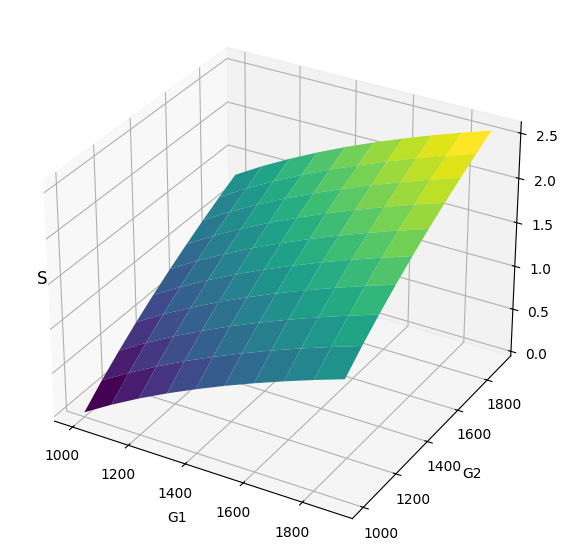

In [43]:
Splot(Ss5c5,'G2')

## 334

In [44]:
v1334 = np.array([
    [2.4005, 2.1848, 2.0096, 1.8566, 1.7273, 1.6057, 1.5017, 1.4436, 1.3348, 1.2785],
    [2.4194, 2.195,  1.9959, 1.8365, 1.7269, 1.603,  1.5114, 1.4159, 1.3477, 1.2629],
    [2.3842, 2.168,  2.0102, 1.8346, 1.7217, 1.6179, 1.4968, 1.4201, 1.3453, 1.2727],
    [2.3871, 2.1778, 1.9918, 1.8451, 1.7115, 1.5902, 1.514,  1.4193, 1.3463, 1.2729],
    [2.3857, 2.1734, 1.9891, 1.8558, 1.733,  1.5883, 1.5012, 1.4126, 1.3321, 1.2737],
    [2.3986, 2.1985, 1.9987, 1.8487, 1.7201, 1.6224, 1.5135, 1.4168, 1.3421, 1.2827],
    [2.3721, 2.1415, 1.9852, 1.8326, 1.7211, 1.5818, 1.4927, 1.4233, 1.3379, 1.2772],
    [2.3512, 2.172,  1.9853, 1.8548, 1.7247, 1.5969, 1.5046, 1.3956, 1.3384, 1.2678],
    [2.3775, 2.1677, 1.9483, 1.8463, 1.6998, 1.5963, 1.5032, 1.4101, 1.3277, 1.2701],
    [2.3786, 2.1636, 1.9693, 1.8576, 1.7046, 1.5951, 1.4827, 1.4267, 1.3187, 1.2701]
])

In [45]:
v2334 = np.array([
    [2.407,  2.4146, 2.3882, 2.3672, 2.3863, 2.3625, 2.3707, 2.398,  2.3883, 2.3902],
    [2.1868, 2.1834, 2.1698, 2.1696, 2.1565, 2.1665, 2.17,   2.1647, 2.1461, 2.1759],
    [2.0091, 2.012,  2.0026, 1.9918, 1.9763, 1.9867, 1.9926, 1.9895, 1.969,  1.9941],
    [1.8525, 1.8551, 1.8357, 1.8357, 1.8439, 1.8412, 1.8335, 1.8357, 1.8345, 1.829 ],
    [1.724,  1.7021, 1.72,   1.722,  1.7044, 1.7206, 1.6873, 1.7142, 1.7018, 1.6976],
    [1.6126, 1.6146, 1.6039, 1.595,  1.6066, 1.6124, 1.6081, 1.5827, 1.592,  1.5922],
    [1.5062, 1.5273, 1.5258, 1.5041, 1.5116, 1.4878, 1.5051, 1.4898, 1.492,  1.504 ],
    [1.4301, 1.4183, 1.4205, 1.4217, 1.4215, 1.4206, 1.4244, 1.4185, 1.3951, 1.4093],
    [1.3459, 1.3385, 1.3496, 1.3258, 1.3408, 1.3424, 1.343,  1.3257, 1.3192, 1.3295],
    [1.2755, 1.2859, 1.2787, 1.2733, 1.273,  1.2732, 1.2807, 1.273,  1.2636, 1.2736]
])

In [46]:
TS2334=0.3*normalize_F(compute_Fs(v1334, v2334, 1, 3, 3, beta=1.0))+0.3*normalize_F(compute_Fc(v1334, v2334, 1, 3, 3, beta=1.0))+0.4*normalize_F(compute_F(v1334, v2334, 1, 3, 3, beta=1.0))

In [47]:
S2334, results, rss, tss, ratio=recover_S_ols_summary(v1334, v2334, step=0.1)

RSS (residual sum of squares): 5.892054e-05
TSS (total sum of b²):         5.451156e+00
Circulating / total ratio:     0.001081%


In [48]:
TS2334

array([[0.        , 0.21865   , 0.44613819, 0.65810609, 0.81316651,
        1.01348248, 1.16725427, 1.23558891, 1.43516946, 1.53782914],
       [0.21169313, 0.4487834 , 0.69216156, 0.89265951, 1.05540618,
        1.22399033, 1.36229056, 1.52596818, 1.66599266, 1.79065969],
       [0.45074641, 0.67483636, 0.86730654, 1.09983171, 1.27132054,
        1.40853494, 1.58910408, 1.71984996, 1.87531731, 1.97937652],
       [0.64344859, 0.85936999, 1.09839068, 1.28183771, 1.45167078,
        1.63200852, 1.76029263, 1.91315637, 2.0421691 , 2.18477534],
       [0.81838537, 1.07164148, 1.25824967, 1.42155388, 1.61038527,
        1.79708975, 1.97953341, 2.08816011, 2.24695717, 2.36102827],
       [0.9669956 , 1.17160514, 1.41509374, 1.61502634, 1.77024972,
        1.90182778, 2.07508364, 2.27196593, 2.38832012, 2.49709481],
       [1.15860606, 1.36851   , 1.55167425, 1.77727416, 1.91544166,
        2.15576458, 2.26707106, 2.40590362, 2.55111096, 2.6436876 ],
       [1.30520687, 1.51385669, 1.7242076

In [49]:
S2334

array([[0.        , 0.22966916, 0.44017373, 0.63372133, 0.81281165,
        0.97949711, 1.13463588, 1.28133584, 1.42023898, 1.55029175],
       [0.22928584, 0.45918876, 0.6686207 , 0.86090361, 1.0398115 ,
        1.20621381, 1.36200468, 1.50892266, 1.64755435, 1.77798452],
       [0.43949374, 0.66787436, 0.87701169, 1.06924091, 1.24714195,
        1.41397694, 1.56998638, 1.71618578, 1.85445624, 1.98577246],
       [0.63221603, 0.86068822, 1.06893581, 1.26078637, 1.43907345,
        1.6050556 , 1.76106313, 1.90735285, 2.04536235, 2.17663162],
       [0.81045614, 1.0384667 , 1.24649193, 1.43839034, 1.61696987,
        1.78292889, 1.93804769, 2.08465013, 2.22232871, 2.35297504],
       [0.97664567, 1.20437553, 1.41270488, 1.60447317, 1.78224679,
        1.94861242, 2.10349361, 2.24976628, 2.3872573 , 2.51783479],
       [1.13407034, 1.36094984, 1.56827891, 1.75972568, 1.93797669,
        2.10381037, 2.25815806, 2.40387408, 2.54190443, 2.67235204],
       [1.28117052, 1.5079146 , 1.7151202

In [50]:
matrix_difference_summary(S2334,TS2334)

Matrix difference diagnostics:
RSS      = 4.17e-02
TSS      = 4.79e+01
RSS/TSS  = 8.72e-04
RMSE     = 2.04e-02
MAE      = 1.66e-02
Max |Δ|  = 5.20e-02


{'RSS': 0.041714326335359,
 'TSS': 47.857197961811536,
 'RSS/TSS': 0.0008716416361995463,
 'RMSE': 0.020424085373734364,
 'MAE': 0.016575279893167916,
 'MaxAbsError': 0.05195421003719236}

In [51]:
model = ols_S_summary2(S2334,TS2334)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.201e+05
Date:                Tue, 03 Feb 2026   Prob (F-statistic):          3.63e-153
Time:                        14:57:38   Log-Likelihood:                 250.55
No. Observations:                 100   AIC:                            -497.1
Df Residuals:                      98   BIC:                            -491.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0097      0.005     -1.840      0.0

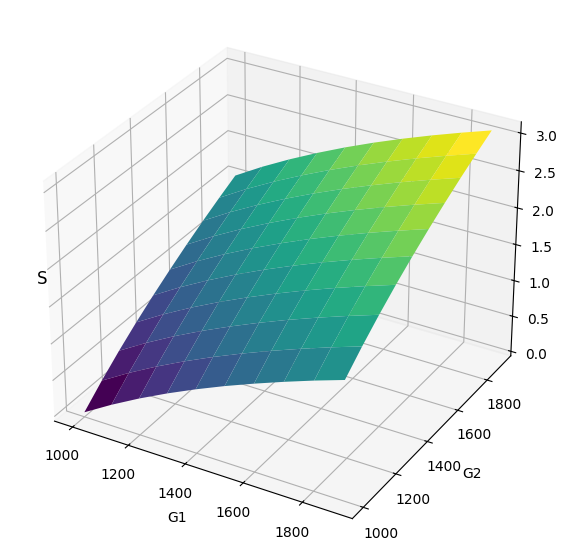

In [52]:
Splot(S2334,'G2')

## not symmetric

In [53]:
import numpy as np

s5dv1 = np.array([
    [2.00269, 1.90886, 1.81651, 1.73244, 1.67892, 1.62614, 1.5589,  1.49637, 1.44296, 1.40868],
    [1.9953,  1.89681, 1.81911, 1.75897, 1.67514, 1.61738, 1.53951, 1.48985, 1.44986, 1.3919],
    [1.99017, 1.89353, 1.81682, 1.75151, 1.67811, 1.60103, 1.54984, 1.46973, 1.44122, 1.38893],
    [1.96917, 1.87531, 1.80811, 1.71088, 1.65944, 1.61447, 1.5361,  1.46186, 1.44832, 1.39854],
    [1.96871, 1.88502, 1.80311, 1.73609, 1.63474, 1.57867, 1.52608, 1.47625, 1.43288, 1.3743],
    [1.97001, 1.8816,  1.79452, 1.72035, 1.66129, 1.59928, 1.52711, 1.46428, 1.43933, 1.36788],
    [1.9561,  1.85887, 1.80553, 1.72522, 1.64741, 1.58719, 1.53203, 1.47748, 1.42702, 1.36688],
    [1.95619, 1.85432, 1.79727, 1.70402, 1.63821, 1.58798, 1.52378, 1.45693, 1.41729, 1.37431],
    [1.95464, 1.88351, 1.79302, 1.70632, 1.6351,  1.60069, 1.51522, 1.44674, 1.41233, 1.36331],
    [1.96554, 1.87254, 1.79386, 1.70707, 1.65644, 1.56574, 1.51235, 1.47103, 1.40854, 1.36248]
])


In [54]:
import numpy as np

s5dv2 = np.array([
    [2.00113, 1.97735, 1.98915, 2.00331, 1.98191, 1.969,   1.99473, 1.95979, 1.987,   1.97743],
    [1.82371, 1.8509,  1.80164, 1.80811, 1.8108,  1.80096, 1.81028, 1.796,   1.80373, 1.80042],
    [1.68511, 1.68362, 1.66494, 1.66284, 1.67167, 1.65949, 1.66098, 1.64175, 1.66311, 1.65047],
    [1.55615, 1.53793, 1.54038, 1.54253, 1.54783, 1.54432, 1.55414, 1.55106, 1.53064, 1.53611],
    [1.44969, 1.44215, 1.44175, 1.44571, 1.41793, 1.43795, 1.41825, 1.42234, 1.43653, 1.42737],
    [1.34705, 1.3524,  1.35956, 1.35384, 1.34402, 1.35267, 1.3416,  1.34233, 1.34722, 1.34313],
    [1.28172, 1.26612, 1.26661, 1.26992, 1.26841, 1.25661, 1.26933, 1.25648, 1.25719, 1.25176],
    [1.19713, 1.19627, 1.20089, 1.19042, 1.1822,  1.19056, 1.20301, 1.18566, 1.1926,  1.1849 ],
    [1.14041, 1.13899, 1.1289,  1.13424, 1.125,    1.12849, 1.13157, 1.12225, 1.12249, 1.11944],
    [1.06762, 1.07963, 1.07562, 1.07969, 1.07282, 1.07429, 1.06282, 1.06144, 1.06616, 1.06344]
])


In [55]:
TSs5c5n=0.4*normalize_F(compute_Fs(s5dv1, s5dv2, 1, 3, 3, beta=1.0))+0.6*normalize_F(compute_Fc(s5dv1, s5dv2,1, 3, 3, beta=1.0))

In [56]:
Ss5c5n, results, rss, tss, ratio=recover_S_ols_summary2(s5dv1, s5dv2, step=[0.1,0.05])

RSS:   2.34e-05
TSS:   2.52e+00
Ratio: 9.27e-06


In [57]:
model = ols_S_summary2(Ss5c5n,TSs5c5n)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.038e+04
Date:                Tue, 03 Feb 2026   Prob (F-statistic):          8.35e-142
Time:                        14:57:42   Log-Likelihood:                 261.90
No. Observations:                 100   AIC:                            -519.8
Df Residuals:                      98   BIC:                            -514.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.005     -0.726      0.4

## other close pereference1

In [58]:
import numpy as np
# first in second
nv1 = np.array([
    [0.4576,  0.2988,  0.20803, 0.15945, 0.12503, 0.10369, 0.08674, 0.07507, 0.06661, 0.05893],
    [0.47691, 0.30044, 0.21276, 0.15955, 0.12602, 0.10436, 0.08661, 0.07469, 0.06647, 0.05888],
    [0.47206, 0.29633, 0.21263, 0.1607,  0.12556, 0.1037,  0.08863, 0.07562, 0.06661, 0.05903],
    [0.46551, 0.30165, 0.21224, 0.15969, 0.12432, 0.10313, 0.08743, 0.07509, 0.06624, 0.05918],
    [0.47679, 0.3028,  0.21423, 0.16015, 0.12748, 0.10313, 0.08769, 0.07522, 0.06709, 0.05908],
    [0.48128, 0.30248, 0.21197, 0.15808, 0.12675, 0.10207, 0.08702, 0.07471, 0.06599, 0.05882],
    [0.46474, 0.3052,  0.2132,  0.15909, 0.12535, 0.10254, 0.08697, 0.07596, 0.06671, 0.05976],
    [0.46092, 0.30835, 0.21483, 0.15928, 0.12582, 0.10214, 0.08779, 0.07517, 0.06662, 0.05866],
    [0.46026, 0.30256, 0.21307, 0.16234, 0.1268,  0.10194, 0.08735, 0.0761,  0.06652, 0.05876],
    [0.45181, 0.29838, 0.21138, 0.1601,  0.12538, 0.1032,  0.08762, 0.0759,  0.06659, 0.0598 ]
])


In [59]:
import numpy as np

nb= np.array([
    [3.00829, 3.02873, 3.00325, 2.98567, 3.03105, 2.98713, 2.98885, 3.01316, 2.99289, 3.01118],
    [2.73998, 2.74104, 2.71150, 2.69242, 2.74651, 2.73951, 2.74563, 2.72403, 2.71700, 2.71659],
    [2.50036, 2.48600, 2.50685, 2.48372, 2.51306, 2.49040, 2.48508, 2.51344, 2.48259, 2.52607],
    [2.32387, 2.29872, 2.31477, 2.33224, 2.30429, 2.31997, 2.29441, 2.30311, 2.32048, 2.30828],
    [2.13501, 2.12842, 2.16176, 2.15059, 2.13998, 2.12180, 2.15626, 2.13213, 2.14940, 2.13567],
    [1.98522, 1.99888, 1.99982, 2.00769, 2.00585, 2.00597, 2.01271, 2.00233, 1.99901, 2.00114],
    [1.86390, 1.88434, 1.86290, 1.88447, 1.86022, 1.86510, 1.88643, 1.86449, 1.86125, 1.87033],
    [1.75991, 1.75794, 1.74764, 1.76729, 1.77056, 1.77610, 1.76937, 1.77652, 1.77045, 1.76538],
    [1.67021, 1.66188, 1.68409, 1.66512, 1.66425, 1.66666, 1.67581, 1.64907, 1.68407, 1.65639],
    [1.57164, 1.56517, 1.57247, 1.58000, 1.57572, 1.56914, 1.56046, 1.58601, 1.57843, 1.56706]
])



In [60]:
Sn, results, rss, tss, ratio=recover_S_ols_summary(nv1, nb, step=0.1)
#model = ols_S_summary2(Sn,TS2334)


RSS (residual sum of squares): 4.696723e-05
TSS (total sum of b²):         4.301247e+00
Circulating / total ratio:     0.001092%


In [61]:
Sn

array([[0.        , 0.03820413, 0.06468838, 0.08368627, 0.09665652,
        0.10853835, 0.11816032, 0.12634797, 0.13382758, 0.13982031],
       [0.28702937, 0.32593401, 0.35094473, 0.36946841, 0.38383495,
        0.3952157 , 0.40488764, 0.41290901, 0.42000197, 0.42592453],
       [0.54862511, 0.5872138 , 0.61182364, 0.62997319, 0.64534017,
        0.65679486, 0.66659353, 0.67440546, 0.68104125, 0.68742832],
       [0.78924616, 0.82738493, 0.85254484, 0.87089803, 0.88579669,
        0.89720655, 0.90632114, 0.91493105, 0.92167376, 0.92862167],
       [1.01181893, 1.04999242, 1.07572027, 1.09422488, 1.10826002,
        1.11963902, 1.12871043, 1.13719886, 1.14464605, 1.15097195],
       [1.21826521, 1.25692556, 1.28323894, 1.30145622, 1.31560648,
        1.32668957, 1.3362022 , 1.34443891, 1.35185912, 1.35798263],
       [1.41168365, 1.45053615, 1.47669071, 1.49518757, 1.50923161,
        1.52048908, 1.53011038, 1.53806198, 1.54516688, 1.55160932],
       [1.59348109, 1.63222069, 1.6578856

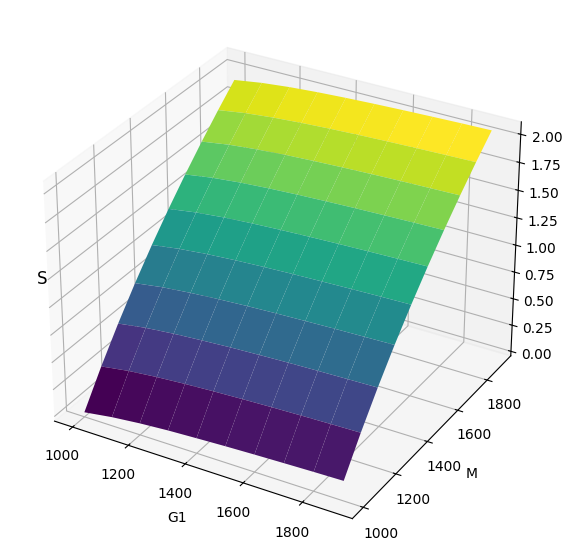

In [62]:
Splot(Sn,'G2')

## to 300

In [63]:
import numpy as np

nv12 = np.array([
    [0.15938, 0.2127 , 0.29765, 0.48044, 0.76958, 1.35699, 2.35111, 4.2065 ,  8.58942, 26.93246],
    [0.16167, 0.20945, 0.3112 , 0.47446, 0.79757, 1.36188, 2.35271, 4.21592,  8.47881, 26.88293],
    [0.16064, 0.20983, 0.30597, 0.46901, 0.78281, 1.35292, 2.36544, 4.25154,  8.56021, 26.98417],
    [0.15875, 0.21174, 0.30795, 0.47796, 0.78081, 1.35441, 2.37029, 4.15034,  8.51632, 27.38048],
    [0.16133, 0.21106, 0.30286, 0.46532, 0.79872, 1.34478, 2.34559, 4.25371,  8.52187, 26.83791],
    [0.15864, 0.21009, 0.30705, 0.47245, 0.78895, 1.35685, 2.34104, 4.22556,  8.61881, 26.93665],
    [0.1588 , 0.2129 , 0.3017 , 0.46412, 0.78221, 1.36627, 2.35569, 4.18809,  8.57586, 27.1114 ],
    [0.15894, 0.21215, 0.3065 , 0.46104, 0.78617, 1.35236, 2.34124, 4.25711,  8.65161, 26.88355],
    [0.15904, 0.21484, 0.30427, 0.46343, 0.78888, 1.33332, 2.32957, 4.16262,  8.56798, 27.05829],
    [0.15938, 0.21383, 0.29802, 0.46466, 0.8005 , 1.35699, 2.35581, 4.16484,  8.61063, 27.30982]
])


In [64]:
nb2 = np.array([
    [2.32113, 2.29816, 2.31850, 2.30734, 2.30241, 2.30340, 2.31262, 2.31844, 2.31740, 2.31757],
    [2.50112, 2.51285, 2.50196, 2.51932, 2.48360, 2.50361, 2.51440, 2.50225, 2.49135, 2.51065],
    [2.74077, 2.70465, 2.70622, 2.72008, 2.75297, 2.70718, 2.72391, 2.75062, 2.73148, 2.72554],
    [3.00814, 2.97228, 3.01103, 3.00176, 3.00602, 2.99252, 2.98654, 2.99316, 3.00901, 2.97673],
    [3.29782, 3.34485, 3.31414, 3.34502, 3.32732, 3.29706, 3.35606, 3.32857, 3.29862, 3.33882],
    [3.76021, 3.75629, 3.76864, 3.73396, 3.77169, 3.77155, 3.74898, 3.80668, 3.81060, 3.74766],
    [4.29241, 4.26174, 4.28910, 4.29614, 4.26118, 4.33525, 4.24718, 4.29459, 4.28364, 4.29891],
    [4.98112, 5.00033, 5.04273, 4.98195, 4.97804, 4.99999, 4.98467, 4.99320, 5.01611, 4.96940],
    [6.03958, 6.00474, 6.04809, 5.99213, 6.01945, 5.99370, 5.99839, 5.98413, 6.01230, 6.04151],
    [7.45466, 7.42205, 7.45010, 7.57673, 7.50491, 7.57035, 7.50009, 7.45956, 7.44149, 7.56357],
])


In [65]:
import numpy as np
import matplotlib.pyplot as plt

def Splot2(St3, g2_label):
    st_arr = np.array(St3)
    n_rows, n_cols = st_arr.shape

    # 递减坐标：1300, 1200, 1100, ...
    x = 1300 - 100 * np.arange(n_cols)
    y = 1300 - 100 * np.arange(n_rows)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, st_arr, cmap='viridis')

    # 和 Splot 保持一致的视觉逻辑
    ax.set_box_aspect((1, 1, 0.8))
    ax.set_xlabel('G1')
    ax.set_ylabel(g2_label)

    # ✅ 用 text2D 放 Z 轴标签，防止被截断
    ax.text2D(
        0.05, 0.5, "S",
        transform=ax.transAxes,
        va='center',
        fontsize=12
    )

    # 给左侧留空间
    plt.subplots_adjust(left=0.2)
    plt.show()


RSS (residual sum of squares): 5.484967e-04
TSS (total sum of b²):         5.307001e+01
Circulating / total ratio:     0.001034%


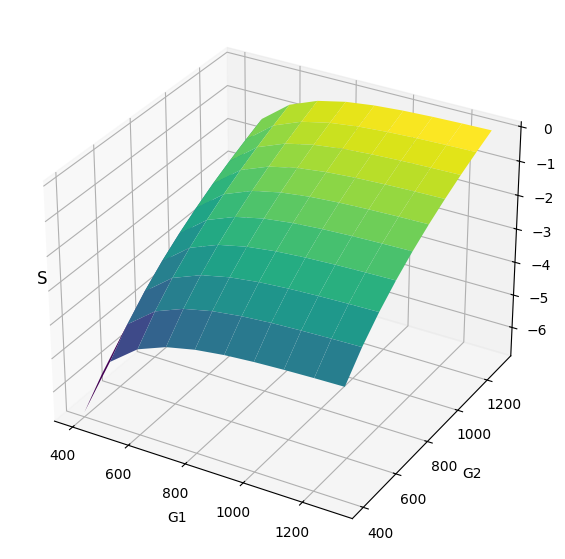

In [67]:
Sn2, results, rss, tss, ratio=recover_S_ols_summary(nv12, nb2, step=0.1)
#model = ols_S_summary2(Sn,TS2334)
Splot2(-Sn2,'G2')

In [71]:
Sn2

array([[0.        , 0.01886843, 0.04442021, 0.08334119, 0.14663019,
        0.2533006 , 0.43859284, 0.76663868, 1.40564091, 3.1801759 ],
       [0.24084807, 0.25964906, 0.28546103, 0.32390266, 0.38637677,
        0.49410578, 0.67966573, 1.00863229, 1.64684365, 3.42002788],
       [0.50243316, 0.52121972, 0.54650869, 0.58538714, 0.64776746,
        0.75502603, 0.94059849, 1.26929512, 1.90712802, 3.6853756 ],
       [0.78910619, 0.80652595, 0.83237939, 0.87133376, 0.93459638,
        1.0412094 , 1.22694508, 1.55510568, 2.1895122 , 3.9750559 ],
       [1.10473647, 1.1228685 , 1.14885614, 1.18786213, 1.25061491,
        1.35723811, 1.54227075, 1.87086932, 2.51062322, 4.28610389],
       [1.45845771, 1.47763243, 1.50290804, 1.54204672, 1.60501952,
        1.71115238, 1.89759897, 2.22496764, 2.86529694, 4.64319006],
       [1.86117023, 1.87956049, 1.90496287, 1.94404819, 2.00717707,
        2.11426693, 2.29999663, 2.62829482, 3.26721236, 5.04840085],
       [2.32512299, 2.34382343, 2.3696002

In [ ]:
Splot_two(Sn, -Sn2)

# edge 

## edge1

In [79]:
import numpy as np

# v1 over time (10 x 10)
e1v1 = np.array([
    [3.0180226447228065, 2.7378209608699886, 2.474193442145834, 2.3059598747878503, 2.1477905737791936, 2.001234083366477, 1.8649730347822882, 1.761308743681755, 1.6744312779302526, 1.5755235813143917],
    [3.0226564304189565, 2.7303279400709712, 2.5005709779538514, 2.287751892105457, 2.145557197573573, 2.013768375011575, 1.8636853101033437, 1.7573578967857473, 1.6647840145351533, 1.584533067412764],
    [3.0006178300846935, 2.7453574481570815, 2.4820804156974328, 2.3124890322358627, 2.149143917103506, 1.9945843270026486, 1.885124203449484, 1.7578930605268785, 1.6607142317143155, 1.5713346097054106],
    [2.9878293043153805, 2.735125081517616, 2.512368985002924, 2.30348860046808, 2.1330447080427315, 2.0018554654666643, 1.8625457559635583, 1.7727785423468085, 1.6801009410030583, 1.5810598943855039],
    [2.9790572591010105, 2.7092822167849664, 2.491541486404235, 2.3236226412533476, 2.145141535382684, 2.0240798230326886, 1.8724455157042772, 1.777344329870774, 1.6551164107465557, 1.5860492384854525],
    [2.9902494230137693, 2.771562741517127, 2.4916931708619114, 2.3284613757558095, 2.1540020022796007, 1.996240800528743, 1.8845146612433301, 1.7642985194010894, 1.679046352537871, 1.5640737362667327],
    [2.992393436775042, 2.705693848349458, 2.501994364876862, 2.304545125649949, 2.1406266937001046, 2.005019688778348, 1.8698323379360402, 1.751682223726336, 1.6648887491689661, 1.5648370484039023],
    [2.9961636123084996, 2.7261262508218187, 2.479408011582518, 2.2959469774485477, 2.1446790688963238, 1.9903702234080862, 1.8838482773122494, 1.7566439298838512, 1.6686173497344443, 1.5746794586071338],
    [3.014899378054752, 2.7119994969373358, 2.5005953923890085, 2.2883835693204135, 2.152941950565743, 2.0101602772347062, 1.8618305666326433, 1.7753665215375491, 1.6778015325840336, 1.593149351145987],
    [2.9957209201528356, 2.734378074594614, 2.5168427114283545, 2.2987953382536084, 2.1515616374342614, 1.9880457209278797, 1.8920970439501896, 1.764691208034031, 1.660904979711617, 1.585023758081632]
])

# money over time (10 x 10)
e1b = np.array([
    [3.0165719548050625, 3.0117903981604823, 3.0277573689814736, 2.9904804666177442, 3.0263160917072986, 3.0008680453301553, 2.9792748866846313, 2.9856381292828247, 2.9759373365843826, 2.9810398029832794],
    [2.7307011057137287, 2.7203318219626262, 2.69029245349937, 2.7392534688526515, 2.724424411924223, 2.7262951365322086, 2.726841705009607, 2.737856793330246, 2.7232780070483145, 2.7495619911661686],
    [2.496517632852962, 2.516559086632198, 2.4936081646229455, 2.4818567330806447, 2.507896265236461, 2.516350638314426, 2.5104513933445234, 2.503847795104031, 2.5014567921906723, 2.501545882292305],
    [2.316598570928756, 2.31947190551554, 2.3034784866611457, 2.31358931948487, 2.3340206649865287, 2.305995562507372, 2.3158676534020475, 2.317983076472431, 2.30234911880212, 2.332625404777614],
    [2.1422715648145605, 2.124831494488944, 2.1447575608174496, 2.1307032433811783, 2.1285336367898076, 2.1274711322991875, 2.1418675597564523, 2.1382852595461417, 2.135033898233768, 2.1512438902393214],
    [1.9937606318504022, 1.994864283392038, 1.9675556797101879, 1.9961108594665304, 1.9765061291127528, 1.9734322416854517, 2.0118632747222764, 1.9998038207403057, 1.9969350672907218, 2.0148989539198943],
    [1.8847656726615023, 1.8798316959793544, 1.8615297427038258, 1.8615315524431912, 1.8765663718343344, 1.871157656278128, 1.862713254069541, 1.8725939208992604, 1.8779949733430614, 1.885564982480875],
    [1.7676171589854361, 1.754818756397435, 1.7726377982685422, 1.7688695236186625, 1.781829621130441, 1.758360180549533, 1.7796868728635793, 1.7555575514546167, 1.7650233428982494, 1.7640465827911118],
    [1.6491132586026593, 1.6753617238775262, 1.6639272171560076, 1.6756928608352253, 1.6554717634911402, 1.6629976182130202, 1.6701701693929143, 1.6444542547832164, 1.6588192872241838, 1.6674250378125708],
    [1.5829882615191295, 1.5758169804361999, 1.5907204285258838, 1.589426818365716, 1.5821418016129019, 1.569703326836378, 1.5731118589309845, 1.5850087593827418, 1.570860586731871, 1.5674853572335044]
])


RSS (residual sum of squares): 6.696634e-05
TSS (total sum of b²):         8.537891e+00
Circulating / total ratio:     0.000784%


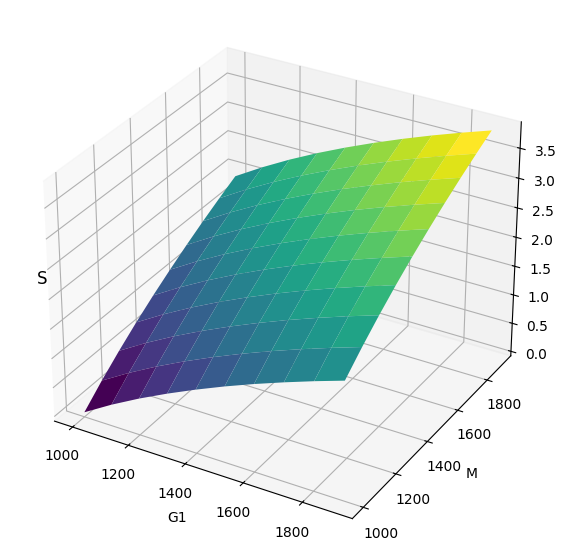

In [80]:
Se1, results, rss, tss, ratio=recover_S_ols_summary(e1v1, e1b, step=0.1)
#model = ols_S_summary2(Se1,TS2334)
Splot(Se1,'M')

In [81]:
matrix_difference_summary(Se1,TS)

Matrix difference diagnostics:
RSS      = 9.24e-04
TSS      = 7.48e+01
RSS/TSS  = 1.23e-05
RMSE     = 3.04e-03
MAE      = 2.87e-03
Max |Δ|  = 5.00e-03


{'RSS': 0.0009240279369514911,
 'TSS': 74.8404669541527,
 'RSS/TSS': 1.2346635110087582e-05,
 'RMSE': 0.0030397827832782578,
 'MAE': 0.0028720474024018037,
 'MaxAbsError': 0.004999947857475817}

In [82]:
model = ols_S_summary2(Se1,TS)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.287e+08
Date:                Tue, 03 Feb 2026   Prob (F-statistic):          1.28e-301
Time:                        18:15:09   Log-Likelihood:                 576.99
No. Observations:                 100   AIC:                            -1150.
Df Residuals:                      98   BIC:                            -1145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.000      6.415      0.0

## edge2

In [124]:
import numpy as np

e2v1 = np.array([
    [1.84914, 1.68808, 1.55399, 1.43114, 1.32541, 1.22957, 1.15305, 1.10032, 1.03394, 0.97291],
    [1.85959, 1.68515, 1.54917, 1.42444, 1.32920, 1.23935, 1.16071, 1.09705, 1.03214, 0.98388],
    [1.85186, 1.70095, 1.55395, 1.42804, 1.33750, 1.23415, 1.16218, 1.08844, 1.02615, 0.97185],
    [1.86833, 1.68913, 1.54450, 1.42507, 1.32986, 1.23259, 1.15681, 1.09966, 1.02688, 0.98041],
    [1.84497, 1.70819, 1.54541, 1.43880, 1.32092, 1.23517, 1.16559, 1.09598, 1.02412, 0.97458],
    [1.86584, 1.68734, 1.54149, 1.42476, 1.31677, 1.22993, 1.15611, 1.08858, 1.03369, 0.98019],
    [1.85672, 1.67197, 1.54466, 1.43354, 1.34504, 1.22993, 1.16663, 1.09467, 1.03395, 0.97548],
    [1.86910, 1.67898, 1.54547, 1.42859, 1.32542, 1.23725, 1.15599, 1.09228, 1.03432, 0.97664],
    [1.89213, 1.70369, 1.55933, 1.43850, 1.32940, 1.24526, 1.16905, 1.09114, 1.02694, 0.97068],
    [1.85809, 1.65525, 1.54023, 1.41226, 1.32112, 1.24189, 1.17216, 1.09108, 1.03903, 0.98492]
])


In [125]:
e2b = np.array([
    [1.85504, 1.84966, 1.86964, 1.83908, 1.85009, 1.85118, 1.85739, 1.85281, 1.84026, 1.86688],
    [1.69445, 1.68360, 1.70489, 1.68385, 1.69790, 1.68842, 1.67684, 1.69284, 1.66539, 1.69480],
    [1.55969, 1.53857, 1.55062, 1.52747, 1.53992, 1.54846, 1.52908, 1.56201, 1.54971, 1.53645],
    [1.41440, 1.42627, 1.42458, 1.41957, 1.42814, 1.43714, 1.42672, 1.44152, 1.42283, 1.43220],
    [1.33457, 1.30737, 1.32245, 1.32402, 1.32144, 1.31966, 1.32304, 1.32767, 1.31208, 1.32015],
    [1.23500, 1.24354, 1.23802, 1.24020, 1.22910, 1.22707, 1.23184, 1.24082, 1.21983, 1.23898],
    [1.15955, 1.15822, 1.16621, 1.16473, 1.16967, 1.15799, 1.15382, 1.16404, 1.16345, 1.15480],
    [1.09550, 1.09136, 1.09469, 1.09295, 1.09936, 1.09933, 1.08280, 1.09373, 1.08937, 1.09055],
    [1.03005, 1.02412, 1.02956, 1.02768, 1.03906, 1.03703, 1.03528, 1.02751, 1.03151, 1.03003],
    [0.97775, 0.97683, 0.97255, 0.98287, 0.97704, 0.98198, 0.97150, 0.97921, 0.96525, 0.97321]
])

RSS (residual sum of squares): 5.120968e-05
TSS (total sum of b²):         3.268488e+00
Circulating / total ratio:     0.001567%


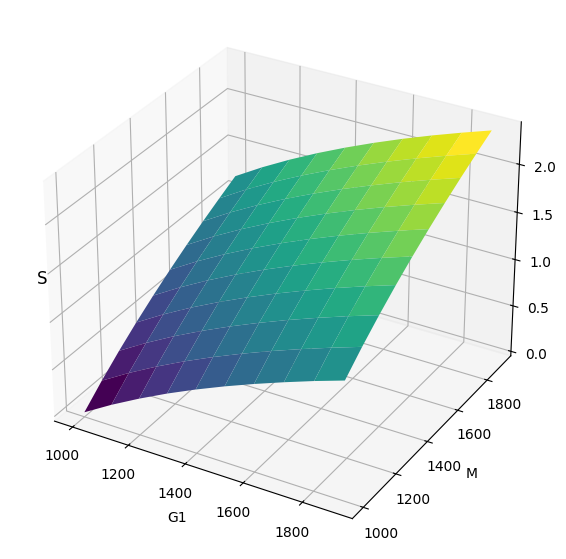

In [126]:
Se2, results, rss, tss, ratio=recover_S_ols_summary(e2v1, e2b, step=0.1)
#model = ols_S_summary2(Se1,TS2334)
Splot(Se2,'M')

In [127]:
Se2

array([[0.     , 0.17725, 0.33901, 0.48887, 0.62657, 0.7547 , 0.87428,
        0.98688, 1.09393, 1.19366],
       [0.17708, 0.35464, 0.5168 , 0.66575, 0.80347, 0.93161, 1.0515 ,
        1.16376, 1.27017, 1.37113],
       [0.33908, 0.51636, 0.67879, 0.82729, 0.96517, 1.0932 , 1.21283,
        1.32553, 1.43167, 1.53223],
       [0.48743, 0.66518, 0.82706, 0.97543, 1.11353, 1.24186, 1.36131,
        1.4745 , 1.58079, 1.68086],
       [0.62465, 0.80211, 0.96421, 1.11293, 1.25112, 1.3793 , 1.49909,
        1.61215, 1.71829, 1.81837],
       [0.75309, 0.93031, 1.09195, 1.24075, 1.37859, 1.50686, 1.6269 ,
        1.7396 , 1.84565, 1.94637],
       [0.87321, 1.05039, 1.2116 , 1.36034, 1.49829, 1.62653, 1.74653,
        1.8594 , 1.96548, 2.06612],
       [0.98562, 1.16324, 1.32464, 1.47337, 1.61105, 1.73914, 1.85908,
        1.972  , 2.07825, 2.17863],
       [1.09134, 1.26941, 1.43098, 1.57961, 1.71729, 1.84536, 1.96548,
        2.07835, 2.18452, 2.28474],
       [1.19289, 1.36972, 1.53092, 1.

## edge3

In [128]:
e3v1 = np.array([
    [1.85373, 1.68886, 1.54929, 1.41313, 1.33353, 1.23583, 1.15206, 1.08965, 1.03027, 0.98282],
    [1.86176, 1.68029, 1.53585, 1.43356, 1.34101, 1.23788, 1.15632, 1.09957, 1.03373, 0.97934],
    [1.83800, 1.69190, 1.55066, 1.43933, 1.33594, 1.23941, 1.15856, 1.09946, 1.04099, 0.98399],
    [1.84503, 1.69163, 1.55161, 1.42998, 1.32793, 1.24730, 1.15508, 1.08734, 1.02894, 0.98004],
    [1.87422, 1.66783, 1.55701, 1.42587, 1.33801, 1.22617, 1.16878, 1.09168, 1.02312, 0.98608],
    [1.84858, 1.71221, 1.55707, 1.44658, 1.33935, 1.23418, 1.15900, 1.09031, 1.02849, 0.98008],
    [1.86475, 1.70555, 1.55784, 1.42692, 1.32210, 1.22527, 1.17607, 1.10130, 1.02596, 0.98205],
    [1.85127, 1.68915, 1.55590, 1.42224, 1.34417, 1.23861, 1.14945, 1.08035, 1.03348, 0.98011],
    [1.85789, 1.67311, 1.54392, 1.41628, 1.33357, 1.24331, 1.16160, 1.09672, 1.03828, 0.98284],
    [1.84863, 1.69594, 1.54186, 1.42308, 1.31849, 1.23158, 1.16041, 1.09422, 1.02859, 0.97291]
])

In [129]:
e3b = np.array([
    [1.84268, 1.86837, 1.85574, 1.85582, 1.85525, 1.84639, 1.85748, 1.84566, 1.85391, 1.85285],
    [1.66682, 1.68024, 1.68527, 1.67833, 1.67587, 1.68850, 1.67752, 1.68380, 1.69904, 1.68660],
    [1.54703, 1.55173, 1.54494, 1.53630, 1.54746, 1.53411, 1.53819, 1.54585, 1.54016, 1.55767],
    [1.42505, 1.42847, 1.42326, 1.43208, 1.44668, 1.42408, 1.43068, 1.42550, 1.42122, 1.43695],
    [1.32418, 1.32341, 1.32469, 1.32518, 1.33802, 1.33643, 1.32309, 1.33570, 1.32848, 1.33148],
    [1.22373, 1.22945, 1.23260, 1.23996, 1.23635, 1.23695, 1.22477, 1.24721, 1.24521, 1.24180],
    [1.15617, 1.16329, 1.15632, 1.16012, 1.14807, 1.15471, 1.17209, 1.17287, 1.15800, 1.17168],
    [1.07701, 1.08934, 1.09987, 1.08435, 1.08446, 1.08463, 1.09876, 1.09360, 1.10772, 1.10090],
    [1.02546, 1.03472, 1.02458, 1.03537, 1.02865, 1.01887, 1.03261, 1.03415, 1.03438, 1.03335],
    [0.98202, 0.97263, 0.97397, 0.98466, 0.97103, 0.97958, 0.98436, 0.97112, 0.97856, 0.96627]
])

RSS (residual sum of squares): 3.687673e-05
TSS (total sum of b²):         3.270590e+00
Circulating / total ratio:     0.001128%


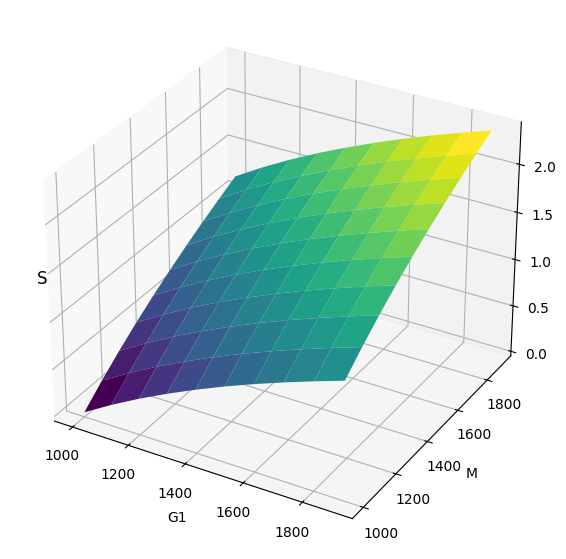

In [130]:
Se3, results, rss, tss, ratio=recover_S_ols_summary(e3v1, e3b, step=0.1)
#model = ols_S_summary2(Se1,TS2334)
Splot(Se3,'M')

In [114]:
Se3

array([[0.     , 0.17648, 0.33823, 0.48678, 0.62467, 0.7534 , 0.87297,
        0.98517, 1.09095, 1.19164],
       [0.17613, 0.3534 , 0.51472, 0.66335, 0.80152, 0.93025, 1.04977,
        1.16198, 1.26835, 1.36865],
       [0.33731, 0.51416, 0.67601, 0.82465, 0.96263, 1.09145, 1.21099,
        1.32352, 1.43011, 1.53055],
       [0.48604, 0.66295, 0.82477, 0.97359, 1.11146, 1.23985, 1.35988,
        1.47219, 1.57836, 1.67916],
       [0.62355, 0.80076, 0.96243, 1.11172, 1.25015, 1.37808, 1.49775,
        1.61018, 1.71602, 1.81682],
       [0.75089, 0.92831, 1.09083, 1.24017, 1.37885, 1.50675, 1.62585,
        1.73857, 1.84463, 1.94507],
       [0.87045, 1.04816, 1.21071, 1.36015, 1.49819, 1.62611, 1.74559,
        1.85893, 1.96485, 2.06533],
       [0.98349, 1.1608 , 1.32315, 1.47195, 1.60998, 1.73901, 1.85896,
        1.97153, 2.07766, 2.17864],
       [1.08971, 1.26721, 1.42921, 1.5777 , 1.71563, 1.84445, 1.96484,
        2.07782, 2.18444, 2.28532],
       [1.19022, 1.36759, 1.52963, 1.

In [131]:
gm2 = build_gm_matrix(2, 3.8, 0.2)
TSe = compute_S_from_gm(gm2)
np.set_printoptions(precision=5, suppress=True)
print(TS/2)


[[0.      0.14297 0.27348 0.39355 0.50471 0.6082  0.70501 0.79594 0.88168
  0.96278]
 [0.14297 0.28593 0.41645 0.53651 0.64767 0.75116 0.84797 0.93891 1.02465
  1.10575]
 [0.27348 0.41645 0.54696 0.66703 0.77819 0.88168 0.97849 1.06942 1.15516
  1.23626]
 [0.39355 0.53651 0.66703 0.78709 0.89825 1.00174 1.09855 1.18949 1.27523
  1.35633]
 [0.50471 0.64767 0.77819 0.89825 1.00942 1.11291 1.20971 1.30065 1.38639
  1.46749]
 [0.6082  0.75116 0.88168 1.00174 1.11291 1.2164  1.3132  1.40414 1.48988
  1.57098]
 [0.70501 0.84797 0.97849 1.09855 1.20971 1.3132  1.41001 1.50095 1.58669
  1.66779]
 [0.79594 0.93891 1.06942 1.18949 1.30065 1.40414 1.50095 1.59188 1.67762
  1.75872]
 [0.88168 1.02465 1.15516 1.27523 1.38639 1.48988 1.58669 1.67762 1.76336
  1.84446]
 [0.96278 1.10575 1.23626 1.35633 1.46749 1.57098 1.66779 1.75872 1.84446
  1.92556]]


In [132]:
gm2 = build_gm_matrix(1, 1.9, 0.1)
TSe = compute_S_from_gm(gm2)
np.set_printoptions(precision=5, suppress=True)
print(TS*np.log(2))

[[0.      0.19819 0.37913 0.54557 0.69967 0.84314 0.97735 1.10341 1.22227
  1.3347 ]
 [0.19819 0.39638 0.57732 0.74376 0.89787 1.04133 1.17554 1.3016  1.42046
  1.53289]
 [0.37913 0.57732 0.75825 0.9247  1.0788  1.22227 1.35647 1.48254 1.6014
  1.71382]
 [0.54557 0.74376 0.9247  1.09114 1.24525 1.38871 1.52292 1.64898 1.76784
  1.88027]
 [0.69967 0.89787 1.0788  1.24525 1.39935 1.54282 1.67702 1.80308 1.92194
  2.03437]
 [0.84314 1.04133 1.22227 1.38871 1.54282 1.68628 1.82049 1.94655 2.06541
  2.17784]
 [0.97735 1.17554 1.35647 1.52292 1.67702 1.82049 1.95469 2.08076 2.19961
  2.31204]
 [1.10341 1.3016  1.48254 1.64898 1.80308 1.94655 2.08076 2.20682 2.32568
  2.43811]
 [1.22227 1.42046 1.6014  1.76784 1.92194 2.06541 2.19961 2.32568 2.44454
  2.55697]
 [1.3347  1.53289 1.71382 1.88027 2.03437 2.17784 2.31204 2.43811 2.55697
  2.6694 ]]


In [104]:
matrix_difference_summary(Se3,TSe)

Matrix difference diagnostics:
RSS      = 7.53e+01
TSS      = 2.87e+01
RSS/TSS  = 2.63e+00
RMSE     = 8.68e-01
MAE      = 8.03e-01
Max |Δ|  = 1.47e+00


{'RSS': 75.32206965355698,
 'TSS': 28.688779871957983,
 'RSS/TSS': 2.625488779576192,
 'RMSE': 0.8678828818081215,
 'MAE': 0.8031734133624758,
 'MaxAbsError': 1.466031512432254}

## neighbour

## neighbour1

In [84]:
import numpy as np

n1v1 = np.array([
    [4.00911, 3.71367, 3.51617, 3.336,   3.16786, 2.98379, 2.89348, 2.773,   2.66245, 2.59343],
    [4.01063, 3.72646, 3.51114, 3.27945, 3.13914, 3.00537, 2.86297, 2.75536, 2.6678,  2.58163],
    [3.97483, 3.74173, 3.49978, 3.30936, 3.15413, 3.02772, 2.84504, 2.76305, 2.65068, 2.58077],
    [3.97844, 3.72784, 3.47704, 3.32316, 3.15975, 2.98679, 2.87846, 2.76303, 2.66234, 2.54577],
    [3.99638, 3.7114,  3.48214, 3.28984, 3.12993, 3.00698, 2.88747, 2.76233, 2.67825, 2.57566],
    [4.03137, 3.70857, 3.48357, 3.31595, 3.15546, 3.01283, 2.88048, 2.75972, 2.65675, 2.54891],
    [4.01154, 3.68952, 3.48413, 3.2687,  3.14525, 2.98542, 2.88581, 2.73848, 2.66285, 2.59157],
    [3.97143, 3.75734, 3.49372, 3.3074,  3.11866, 2.99824, 2.84034, 2.784,   2.6674,  2.55748],
    [3.99818, 3.76009, 3.47447, 3.29424, 3.13475, 2.99444, 2.87643, 2.73672, 2.66719, 2.57417],
    [3.97536, 3.76292, 3.48285, 3.30634, 3.16269, 2.97335, 2.87367, 2.76034, 2.63161, 2.56883]
])


In [85]:
n1b = np.array([
    [3.00167, 3.02791, 2.9758,  2.98046, 3.00297, 2.97219, 3.02619, 2.98203, 2.98765, 2.99281],
    [2.74962, 2.72692, 2.72415, 2.7514,  2.71368, 2.74128, 2.73652, 2.71513, 2.7078,  2.71631],
    [2.48253, 2.50086, 2.49425, 2.49949, 2.5001,  2.49571, 2.50803, 2.49214, 2.48243, 2.52057],
    [2.29885, 2.30825, 2.28958, 2.32148, 2.30678, 2.31541, 2.3055,  2.30851, 2.30355, 2.32604],
    [2.15399, 2.14563, 2.15006, 2.14384, 2.13565, 2.13277, 2.15092, 2.15963, 2.1455,  2.14431],
    [1.98918, 2.00922, 1.98815, 2.01065, 2.00015, 2.009,   2.00034, 1.99354, 1.99501, 2.00128],
    [1.8845,  1.86908, 1.87139, 1.88924, 1.86057, 1.87546, 1.90493, 1.88914, 1.86173, 1.87192],
    [1.77272, 1.75566, 1.76508, 1.76577, 1.77425, 1.76244, 1.76639, 1.75299, 1.77648, 1.75546],
    [1.67091, 1.67058, 1.66842, 1.66128, 1.65462, 1.65889, 1.68918, 1.67608, 1.67139, 1.65268],
    [1.55612, 1.58107, 1.58024, 1.56782, 1.5798,  1.58559, 1.58026, 1.59185, 1.58173, 1.58988]
])


In [86]:
Sn1

array([[0.        , 0.38616547, 0.74784296, 1.08862544, 1.41227409,
        1.71901912, 2.01178015, 2.29499269, 2.56635183, 2.82843539],
       [0.28753803, 0.67374794, 1.03485197, 1.37493677, 1.6973997 ,
        2.00495763, 2.29892464, 2.58015259, 2.8514214 , 3.11318095],
       [0.54976366, 0.9351093 , 1.29645221, 1.63622147, 1.95858281,
        2.26685457, 2.56039967, 2.84101866, 3.11205271, 3.37360258],
       [0.78993314, 1.17578738, 1.5362791 , 1.8761356 , 2.19942849,
        2.50673017, 2.80001631, 3.08142065, 3.35284171, 3.61448807],
       [1.01313538, 1.39899649, 1.75929772, 2.09896634, 2.42122437,
        2.72840982, 3.02247126, 3.30437444, 3.5756959 , 3.83780142],
       [1.220382  , 1.60710198, 1.96679945, 2.30605567, 2.62861834,
        2.93576999, 3.22959395, 3.51170044, 3.78300554, 4.04428678],
       [1.41443116, 1.80101246, 2.16117792, 2.50070305, 2.82251331,
        3.12984335, 3.42347912, 3.70511682, 3.97561005, 4.23815088],
       [1.59612901, 1.9822903 , 2.3440022

In [87]:
TS

array([[0.        , 0.28593054, 0.54696467, 0.78709279, 1.00941671,
        1.21639532, 1.41001089, 1.59188475, 1.76335999, 1.92556166],
       [0.28593054, 0.57186108, 0.83289521, 1.07302333, 1.29534725,
        1.50232586, 1.69594143, 1.87781529, 2.04929053, 2.2114922 ],
       [0.54696467, 0.83289521, 1.09392934, 1.33405746, 1.55638138,
        1.76335999, 1.95697556, 2.13884942, 2.31032467, 2.47252633],
       [0.78709279, 1.07302333, 1.33405746, 1.57418559, 1.7965095 ,
        2.00348812, 2.19710368, 2.37897755, 2.55045279, 2.71265445],
       [1.00941671, 1.29534725, 1.55638138, 1.7965095 , 2.01883342,
        2.22581203, 2.4194276 , 2.60130146, 2.7727767 , 2.93497837],
       [1.21639532, 1.50232586, 1.76335999, 2.00348812, 2.22581203,
        2.43279065, 2.62640621, 2.80828008, 2.97975532, 3.14195698],
       [1.41001089, 1.69594143, 1.95697556, 2.19710368, 2.4194276 ,
        2.62640621, 2.82002178, 3.00189564, 3.17337088, 3.33557255],
       [1.59188475, 1.87781529, 2.1388494

RSS (residual sum of squares): 9.710542e-05
TSS (total sum of b²):         1.327715e+01
Circulating / total ratio:     0.000731%


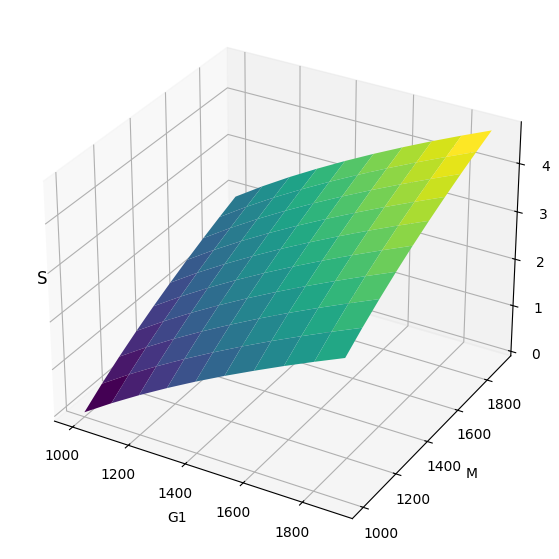

In [75]:
Sn1, results, rss, tss, ratio=recover_S_ols_summary(n1v1, n1b, step=0.1)
#model = ols_S_summary2(Se1,TS2334)
Splot(Sn1,'M')

Matrix difference diagnostics:
RSS      = 2.88e+01
TSS      = 1.18e+02
RSS/TSS  = 2.44e-01
RMSE     = 5.36e-01
MAE      = 4.53e-01
Max |Δ|  = 9.03e-01


{'RSS': 28.757398180848813,
 'TSS': 117.98805975601864,
 'RSS/TSS': 0.24373142706401596,
 'RMSE': 0.5362592486927271,
 'MAE': 0.45304536683969054,
 'MaxAbsError': 0.9028737311177331}

In [83]:
model = ols_S_summary2(Sn1,TS)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2703.
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           3.65e-73
Time:                        22:57:56   Log-Likelihood:                 17.478
No. Observations:                 100   AIC:                            -30.96
Df Residuals:                      98   BIC:                            -25.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0408      0.054     -0.755      0.4

## neighbour 2

In [85]:
import numpy as np

n2v1 = np.array([
    [3.7217,  3.39673, 3.14933, 2.90642, 2.70811, 2.55468, 2.38812, 2.24941, 2.12829, 2.02299],
    [3.71424, 3.36355, 3.16571, 2.939,   2.71044, 2.56006, 2.3772,  2.23918, 2.13273, 2.02592],
    [3.7207,  3.39595, 3.14118, 2.90664, 2.69314, 2.51874, 2.3682,  2.24587, 2.12215, 2.01482],
    [3.6879,  3.38037, 3.11906, 2.91803, 2.70184, 2.5461,  2.36963, 2.27775, 2.13187, 2.02193],
    [3.68819, 3.38265, 3.15563, 2.89744, 2.70957, 2.55366, 2.39794, 2.25282, 2.13079, 2.0324 ],
    [3.74562, 3.39026, 3.12787, 2.92951, 2.71573, 2.52835, 2.37244, 2.25238, 2.12227, 2.01989],
    [3.71099, 3.38425, 3.14552, 2.89878, 2.70798, 2.53635, 2.40246, 2.24217, 2.12422, 2.01735],
    [3.70905, 3.40663, 3.13671, 2.93208, 2.71781, 2.54056, 2.40702, 2.23915, 2.11345, 2.01779],
    [3.69724, 3.4023,  3.14361, 2.91517, 2.71019, 2.54592, 2.37084, 2.27319, 2.11099, 2.00569],
    [3.72213, 3.39913, 3.13494, 2.92421, 2.72073, 2.54399, 2.36657, 2.23309, 2.10883, 2.02018]
])


In [86]:
n2b = np.array([
    [3.03104, 3.01987, 3.00868, 3.00163, 2.98492, 2.98658, 3.00479, 3.0046,  2.9804,  2.98191],
    [2.72888, 2.71385, 2.70947, 2.71771, 2.73286, 2.75415, 2.75047, 2.75879, 2.731,   2.72602],
    [2.48947, 2.49657, 2.51659, 2.49587, 2.48381, 2.4801,  2.50075, 2.49627, 2.49591, 2.49131],
    [2.32422, 2.30588, 2.30501, 2.3061,  2.319,   2.31131, 2.28323, 2.31212, 2.28178, 2.30933],
    [2.13068, 2.14724, 2.1458,  2.11365, 2.14516, 2.12927, 2.1428,  2.16074, 2.1512,  2.14446],
    [2.0111,  1.9949,  1.99255, 1.98889, 2.00123, 2.00173, 2.00182, 1.99475, 1.99838, 2.01212],
    [1.86819, 1.87816, 1.8756,  1.8781,  1.87918, 1.86827, 1.87571, 1.89583, 1.88955, 1.87444],
    [1.78441, 1.78754, 1.76318, 1.78532, 1.76722, 1.7561,  1.76779, 1.7688,  1.7551,  1.75741],
    [1.67297, 1.68487, 1.66235, 1.6477,  1.66972, 1.65756, 1.66317, 1.65336, 1.67964, 1.66468],
    [1.56735, 1.58712, 1.57968, 1.58402, 1.57541, 1.5804,  1.57303, 1.57137, 1.58164, 1.57746]
])


RSS (residual sum of squares): 7.661671e-05
TSS (total sum of b²):         1.104685e+01
Circulating / total ratio:     0.000694%


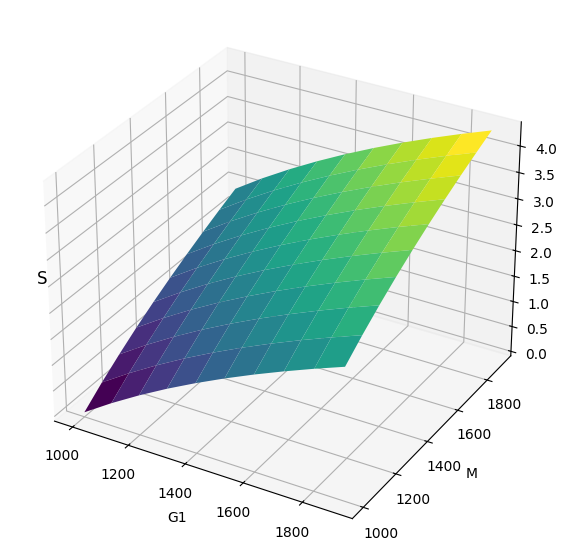

In [87]:
Sn2, results, rss, tss, ratio=recover_S_ols_summary(n2v1, n2b, step=0.1)
#model = ols_S_summary2(Se1,TS2334)
Splot(Sn2,'M')

## S functyion

In [ ]:
import numpy as np

v1m = np.array([
    [2.99818, 2.72841, 2.52246, 2.29946, 2.17009, 1.99806, 1.87323, 1.77367, 1.66661, 1.57818],
    [3.01207, 2.73019, 2.50824, 2.29145, 2.14822, 1.99445, 1.88328, 1.77137, 1.66511, 1.57599],
    [2.98233, 2.73255, 2.47590, 2.30136, 2.13004, 2.00387, 1.86844, 1.74448, 1.65514, 1.57776],
    [2.99572, 2.72773, 2.51916, 2.30751, 2.13469, 1.98901, 1.89825, 1.76828, 1.66518, 1.58322],
    [3.00542, 2.68622, 2.47280, 2.32901, 2.14714, 2.00980, 1.87435, 1.76169, 1.67792, 1.56796],
    [2.98735, 2.71743, 2.50559, 2.28711, 2.13565, 1.99806, 1.87462, 1.77091, 1.69402, 1.57188],
    [2.99417, 2.73522, 2.51368, 2.29539, 2.13153, 2.00381, 1.86906, 1.76544, 1.66298, 1.57774],
    [3.01874, 2.71316, 2.49596, 2.30608, 2.12902, 1.99900, 1.86968, 1.77481, 1.66993, 1.57664],
    [3.00001, 2.71393, 2.49881, 2.30347, 2.16453, 1.98454, 1.87432, 1.75819, 1.68390, 1.57506],
    [3.00989, 2.71810, 2.50982, 2.31934, 2.13325, 1.99714, 1.85550, 1.77136, 1.67382, 1.58326]
])


In [ ]:
import numpy as np

b1m = np.array([
    [3.00342, 2.99841, 3.00295, 3.00118, 2.98624, 2.99667, 2.98649, 2.99433, 3.02708, 2.99603],
    [2.72371, 2.71511, 2.76102, 2.75921, 2.72528, 2.70697, 2.73544, 2.74687, 2.73326, 2.72110],
    [2.48651, 2.48701, 2.48033, 2.48187, 2.49841, 2.51860, 2.49132, 2.48028, 2.52443, 2.50079],
    [2.30912, 2.29450, 2.30038, 2.30900, 2.29956, 2.31085, 2.29405, 2.31106, 2.32545, 2.30255],
    [2.14333, 2.12543, 2.14313, 2.14501, 2.12869, 2.13938, 2.14926, 2.13186, 2.14514, 2.16383],
    [1.99879, 2.00050, 1.99850, 2.00312, 2.00076, 2.04482, 1.98848, 1.97901, 1.98726, 1.99229],
    [1.87023, 1.85682, 1.88182, 1.87994, 1.88119, 1.86562, 1.86803, 1.87953, 1.89761, 1.86150],
    [1.75975, 1.74817, 1.78204, 1.76253, 1.76462, 1.76745, 1.77845, 1.76726, 1.75020, 1.76706],
    [1.66376, 1.68681, 1.66143, 1.65873, 1.66542, 1.66553, 1.66281, 1.64075, 1.65905, 1.66026],
    [1.58126, 1.57339, 1.56994, 1.57965, 1.57726, 1.56491, 1.59041, 1.56009, 1.57322, 1.58278]
])
